In [1]:
#importing required libraries
import pandas as pd
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
#reading the train and test dataset from csv file
train_dp = pd.read_csv("train.csv")
test_dp  = pd.read_csv("test.csv")

In [3]:
#statistics of train data
print(train_dp.describe())

       encounter_id    patient_id  admission_type_id  \
count  1.469600e+04  1.469600e+04       14696.000000   
mean   2.226586e+08  6.750997e+07           1.886296   
std    8.736975e+07  3.524797e+07           1.267142   
min    1.016804e+08  7.290000e+02           1.000000   
25%    1.546245e+08  4.080177e+07           1.000000   
50%    2.042736e+08  6.383513e+07           1.000000   
75%    2.745409e+08  9.240947e+07           3.000000   
max    4.438672e+08  1.893659e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count              14696.000000         14696.000000      14696.000000   
mean                   3.171407             5.271911          4.325463   
std                    4.424569             3.352831          2.915252   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [4]:
train_dp = train_dp.drop(["weight"],axis = 1)

In [5]:
test_dp = test_dp.drop(["weight"],axis = 1)

In [6]:
train_dp.dtypes

encounter_id                 int64
patient_id                   int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
tel_1                       object
tel_2                       object
tel_3                        int64
tel_4                        int64
tel_5                        int64
tel_6                        int64
tel_7                        int64
tel_8                        int64
tel_9                       object
tel_10                      object
tel_11                      object
tel_12                       int64
tel_13                      object
tel_14                      object
tel_15                      object
tel_16                      object
tel_17                      object
tel_18                      object
tel_19                      object
tel_20              

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = '?', strategy = 'most_frequent')
imputer = imputer.fit(train_dp.iloc[:,1:12])
train_dp.iloc[:,1:12] = imputer.transform(train_dp.iloc[:,1:12])


numerical_imputer = SimpleImputer(missing_values = '?', strategy = 'median')
imputer = imputer.fit(train_dp.iloc[:,12:22])
train_dp.iloc[:,12:22] = imputer.transform(train_dp.iloc[:,12:22])



In [8]:
# age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
# train_dp['age'] = train_dp.age.map(age_dict)
# test_dp['age']  = train_dp.age.map(age_dict)

In [9]:
# Categorical boolean mask
categorical_feature_mask_train = train_dp.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols_train = train_dp.columns[categorical_feature_mask_train].tolist()

In [10]:
#Applying Label Encoder on categorical data
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [11]:
# apply le on categorical feature columns for train data
train_dp[categorical_cols_train] = train_dp[categorical_cols_train].apply(lambda col: le.fit_transform(col))

In [12]:
# Categorical boolean mask
categorical_feature_mask_test = test_dp.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols_test = test_dp.columns[categorical_feature_mask_test].tolist()
#Applying Label Encoder on categorical data
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns for test data
test_dp[categorical_cols_train] = test_dp[categorical_cols_test].apply(lambda col: le.fit_transform(col))

In [13]:
numerical_cols_train = train_dp.select_dtypes(include=['int64']).copy()
numerical_cols_train.head(15)

,encounter_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,...,tel_41,tel_42,tel_43,tel_44,tel_45,tel_46,tel_47,tel_48,tel_49,diabetesMed
0,178974720,61754247,2,1,8,1,3,7,6,6,...,0,2,0,0,0,0,0,0,1,1
1,111231666,110498427,0,0,5,3,1,1,2,0,...,0,1,1,0,0,0,0,1,2,1
2,134751624,91719990,2,1,8,1,1,7,5,6,...,0,0,0,0,0,0,0,0,1,1
3,254196636,1897758,2,0,7,3,1,1,3,6,...,0,2,0,0,0,0,0,0,1,1
4,432617750,34636617,1,0,8,2,3,5,2,6,...,0,1,0,0,0,0,0,1,2,1
5,139109832,24224814,0,0,8,1,23,7,3,6,...,0,3,0,0,0,0,0,0,2,1
6,290639712,88293528,0,0,7,3,3,1,8,2,...,0,0,0,0,0,0,0,0,0,1
7,266395878,40937094,2,0,8,2,6,1,2,6,...,0,1,0,0,0,0,0,0,2,1
8,140215032,40962348,2,0,3,3,1,1,5,13,...,0,1,0,0,0,0,0,1,1,1
9,124132824,24617979,0,0,5,1,1,7,3,0,...,0,0,0,0,0,0,0,0,2,1


In [14]:
numerical_cols_train.isnull().sum()

encounter_id                0
patient_id                  0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
tel_1                       0
tel_2                       0
tel_3                       0
tel_4                       0
tel_5                       0
tel_6                       0
tel_7                       0
tel_8                       0
tel_9                       0
tel_10                      0
tel_11                      0
tel_12                      0
tel_13                      0
tel_14                      0
tel_15                      0
tel_16                      0
tel_17                      0
tel_18                      0
tel_19                      0
tel_20                      0
tel_21                      0
tel_22                      0
tel_23                      0
tel_24                      0
tel_25    

In [15]:
train_dp.head(10)

,encounter_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,...,tel_41,tel_42,tel_43,tel_44,tel_45,tel_46,tel_47,tel_48,tel_49,diabetesMed
0,178974720,61754247,2,1,8,1,3,7,6,6,...,0,2,0,0,0,0,0,0,1,1
1,111231666,110498427,0,0,5,3,1,1,2,0,...,0,1,1,0,0,0,0,1,2,1
2,134751624,91719990,2,1,8,1,1,7,5,6,...,0,0,0,0,0,0,0,0,1,1
3,254196636,1897758,2,0,7,3,1,1,3,6,...,0,2,0,0,0,0,0,0,1,1
4,432617750,34636617,1,0,8,2,3,5,2,6,...,0,1,0,0,0,0,0,1,2,1
5,139109832,24224814,0,0,8,1,23,7,3,6,...,0,3,0,0,0,0,0,0,2,1
6,290639712,88293528,0,0,7,3,3,1,8,2,...,0,0,0,0,0,0,0,0,0,1
7,266395878,40937094,2,0,8,2,6,1,2,6,...,0,1,0,0,0,0,0,0,2,1
8,140215032,40962348,2,0,3,3,1,1,5,13,...,0,1,0,0,0,0,0,1,1,1
9,124132824,24617979,0,0,5,1,1,7,3,0,...,0,0,0,0,0,0,0,0,2,1


# Data Visualization :

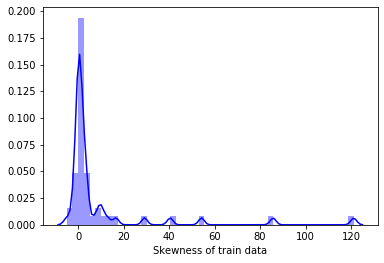

In [16]:
#Distribution plot
sns.distplot(numerical_cols_train.skew(),color = "blue" , axlabel = "Skewness of train data")

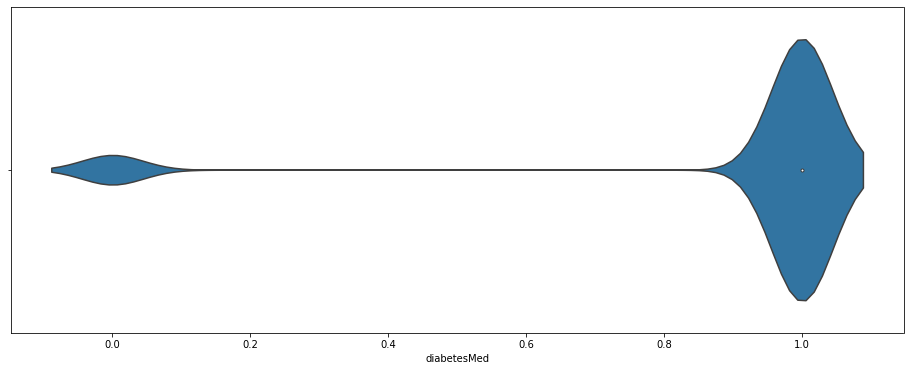

Skewness: -2.642703179521152
Kurtosis: 4.984558432337241


In [17]:
#diabetesMed is our given target/dependent variable. Let's analyse its distribution
f,ax = plt.subplots(1,1,figsize=(16,6))
sns.violinplot(train_dp['diabetesMed'])
plt.show()
#skewness and kurtosis
print("Skewness: {}".format(train_dp['diabetesMed'].skew()))
print("Kurtosis: {}".format(train_dp['diabetesMed'].kurt()))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


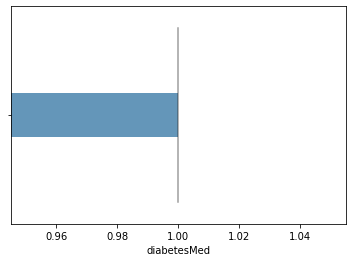

In [18]:
#Boxplot 
sns.boxenplot(train_dp['diabetesMed'])
plt.show()

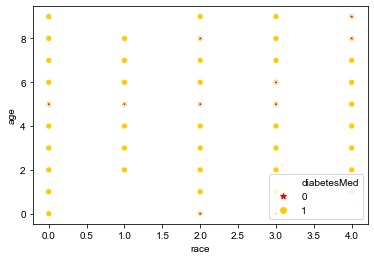

In [19]:
sns.scatterplot(x = "race", y = "age", data=train_dp, hue='diabetesMed', style='diabetesMed', markers=['*', 'o'], palette='hot')
sns.set(style='dark',)
plt.show()

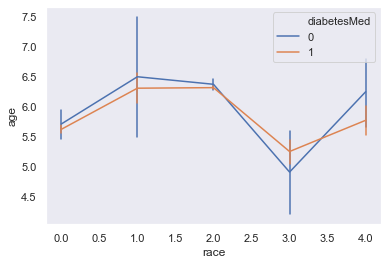

In [20]:
sns.lineplot(x = "race", y = "age", data=train_dp, hue="diabetesMed", err_style="bars")
plt.show()

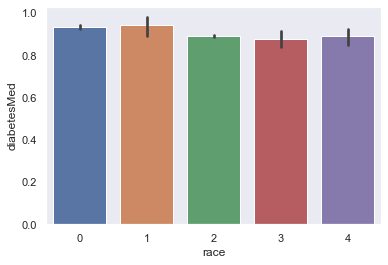

In [21]:
sns.barplot(train_dp['race'],train_dp['diabetesMed'])
plt.show()

In [22]:
train_dp.corr()

,encounter_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,...,tel_41,tel_42,tel_43,tel_44,tel_45,tel_46,tel_47,tel_48,tel_49,diabetesMed
encounter_id,1.000000,0.338983,0.117050,0.011812,0.042255,-0.103913,-0.023383,0.019084,-0.041221,-0.032028,...,NaN,-0.031581,-0.023729,-0.012972,NaN,0.004979,NaN,0.098187,0.069010,-0.286876
patient_id,0.338983,1.000000,0.148823,0.009608,0.028472,-0.027503,-0.011603,0.030602,-0.006459,-0.034315,...,NaN,-0.053978,0.010816,-0.013218,NaN,0.005793,NaN,0.052763,-0.024562,-0.115115
race,0.117050,0.148823,1.000000,0.069797,0.123854,0.078080,0.004157,-0.011617,-0.005844,0.039367,...,NaN,-0.029981,0.013538,0.006784,NaN,0.003034,NaN,0.014802,-0.011164,-0.053184
gender,0.011812,0.009608,0.069797,1.000000,-0.059302,0.023835,-0.023234,0.002572,-0.032517,0.010171,...,NaN,0.003826,0.006546,0.012501,NaN,0.008899,NaN,-0.009110,0.006723,-0.001734
age,0.042255,0.028472,0.123854,-0.059302,1.000000,-0.035882,0.153903,0.025020,0.103624,-0.006276,...,NaN,-0.016014,-0.004128,-0.011577,NaN,0.004372,NaN,0.044317,-0.044845,-0.019299
admission_type_id,-0.103913,-0.027503,0.078080,0.023835,-0.035882,1.000000,-0.001888,-0.196849,-0.004903,0.019267,...,NaN,0.013679,0.011365,-0.007080,NaN,-0.005770,NaN,-0.017115,0.037908,0.039632
discharge_disposition_id,-0.023383,-0.011603,0.004157,-0.023234,0.153903,-0.001888,1.000000,-0.020417,0.191990,0.003237,...,NaN,0.014537,-0.002235,0.000119,NaN,-0.004049,NaN,-0.041977,-0.019115,0.025037
admission_source_id,0.019084,0.030602,-0.011617,0.002572,0.025020,-0.196849,-0.020417,1.000000,0.007265,0.009468,...,NaN,0.004040,-0.021894,0.002906,NaN,0.004252,NaN,0.011528,-0.024331,0.002951
time_in_hospital,-0.041221,-0.006459,-0.005844,-0.032517,0.103624,-0.004903,0.191990,0.007265,1.000000,0.026801,...,NaN,0.036279,0.000355,-0.010920,NaN,-0.006581,NaN,-0.123582,-0.039263,0.058605
tel_1,-0.032028,-0.034315,0.039367,0.010171,-0.006276,0.019267,0.003237,0.009468,0.026801,1.000000,...,NaN,0.000920,0.036075,0.018156,NaN,0.018391,NaN,-0.042035,-0.016550,0.035398


In [23]:
from sklearn.utils import resample


# Separate majority and minority classes
df_majority = train_dp[train_dp["diabetesMed"]==1]
df_minority = train_dp[train_dp["diabetesMed"]==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=13207,    # to match majority class
                                 random_state=123) # reproducible results

train_dp = pd.concat([df_majority, df_minority_upsampled])
train_dp.diabetesMed.value_counts()



1    13207
0    13207
Name: diabetesMed, dtype: int64

In [24]:
#CHi2 feature selection 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X=train_dp.loc[:,train_dp.columns != 'diabetesMed' ]
y =train_dp["diabetesMed"]

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=20)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

20 selected features
['encounter_id', 'patient_id', 'race', 'admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'tel_1', 'tel_3', 'tel_5', 'tel_15', 'tel_18', 'tel_19', 'tel_21', 'tel_22', 'tel_24', 'tel_25', 'tel_42', 'tel_43', 'tel_48', 'tel_49']


In [25]:
def cor_selector(X=X, y=y,num_feats=20):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature =cor_selector()

/Users/714061/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/714061/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=20, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 48 features.


/Users/714061/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 38 features.


/Users/714061/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 28 features.


/Users/714061/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/714061/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


20 selected features


In [27]:

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=20)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

/Users/714061/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 selected features


In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=20)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [29]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':X.columns.tolist(), 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(20)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,tel_48,True,True,True,True,True,5
2,tel_42,True,True,True,True,True,5
3,tel_24,True,True,True,True,True,5
4,tel_22,True,True,True,True,True,5
5,tel_21,True,True,True,True,True,5
6,tel_15,True,True,True,True,True,5
7,encounter_id,True,True,True,True,True,5
8,tel_43,True,True,True,True,False,4
9,tel_25,True,True,True,True,False,4
10,tel_19,True,True,True,True,False,4


In [81]:
X_train = train_dp[['tel_48', 'tel_42', 'tel_24', 'tel_22', 'tel_21', 'tel_15', 'encounter_id', 'tel_43', 'tel_25', 'tel_19','tel_5','tel_49','tel_18','tel_17','tel_16','race','time_in_hospital', 'tel_26','tel_12','tel_1']]
y_train = train_dp["diabetesMed"]
X_test  = test_dp[['tel_48', 'tel_42', 'tel_24', 'tel_22', 'tel_21', 'tel_15', 'encounter_id', 'tel_43', 'tel_25', 'tel_19','tel_5','tel_49','tel_18','tel_17','tel_16','race','time_in_hospital', 'tel_26','tel_12','tel_1']]

In [31]:
#Spltting the data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train ,test_size=0.3, random_state=10)



In [32]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_val)

acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_gbk = recall_score(y_pred, y_val)
print("Gradient Boosting Classifier Accuracy Score:",acc_gbk)
print('Gradient Boosting Classifier Recall Score:',recall_gbk)

Gradient Boosting Classifier Accuracy Score: 99.23
Gradient Boosting Classifier Recall Score: 1.0


In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_gbk = recall_score(y_pred, y_val)
print("Gradient Boosting Classifier Accuracy Score:",acc_gbk)
print('Gradient Boosting Classifier Recall Score:',recall_gbk)

Gradient Boosting Classifier Accuracy Score: 99.27
Gradient Boosting Classifier Recall Score: 1.0


In [34]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 100, max_depth=250, criterion = "gini", min_samples_split=20)
rm.fit(X_train, y_train)
y_pred = rm.predict(X_val)

acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_gbk = recall_score(y_pred, y_val)
print("Gradient Boosting Classifier Accuracy Score:",acc_gbk)
print('Gradient Boosting Classifier Recall Score:',recall_gbk)

Gradient Boosting Classifier Accuracy Score: 99.23
Gradient Boosting Classifier Recall Score: 1.0


In [35]:
import sklearn.neural_network

model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,50,25,5 ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_gbk = recall_score(y_pred, y_val)
print("Gradient Boosting Classifier Accuracy Score:",acc_gbk)
print('Gradient Boosting Classifier Recall Score:',recall_gbk)

Gradient Boosting Classifier Accuracy Score: 52.37
Gradient Boosting Classifier Recall Score: 1.0


In [36]:
train_dp["diabetesMed"].value_counts()

1    13207
0    13207
Name: diabetesMed, dtype: int64

In [37]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', shuffle=True,random_state=101,\
                    tol=1e-3,max_iter=1000)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_val)
print("Gradient Boosting Classifier Accuracy Score:",acc_gbk)
print('Gradient Boosting Classifier Recall Score:',recall_gbk)

Gradient Boosting Classifier Accuracy Score: 52.37
Gradient Boosting Classifier Recall Score: 1.0


In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_gbk = recall_score(y_pred, y_val)
print("Gradient Boosting Classifier Accuracy Score:",acc_gbk)
print('Gradient Boosting Classifier Recall Score:',recall_gbk)


Gradient Boosting Classifier Accuracy Score: 69.94
Gradient Boosting Classifier Recall Score: 0.693568413210827


In [39]:
train_dp.diabetesMed.value_counts()



1    13207
0    13207
Name: diabetesMed, dtype: int64

In [82]:
X_1, X_test, y_1, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3,random_state=1)

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import roc_auc_score


def find_bestC(final_X_tr,y_tr, y_cv, type_of_reg):
    roc_tr=[]
    roc_cv=[]
    max_auc_score=0
    C_best=0
    parameters =[10**-4, 10**-2, 10**0, 10**2, 10**4]
    for i in tqdm(parameters):
        lr=LogisticRegression(C=i, penalty=type_of_reg, class_weight= {0:1, 1:5})
        # fitting the model on train data
        lr.fit(final_X_tr,y_tr)
         #predict the response on the crossvalidation
        pred_cv = lr.predict_proba(X_cv)
        pred_cv=(pred_cv)[:,1]
        roc_cv.append(roc_auc_score(y_cv,pred_cv))

         # predict the response on the traininig
        pred_tr = lr.predict_proba(final_X_tr)
        pred_tr=(pred_tr)[:,1]
        roc_tr.append(roc_auc_score(y_tr,pred_tr))
        #finding best c using max value of auc score
        if roc_auc_score(y_cv,pred_cv)>max_auc_score:
            C_best=i
            max_auc_score=roc_auc_score(y_cv,pred_cv)

    print(C_best)        
    print(max_auc_score)

    #C vs Train and CV
    plt.plot(np.log(parameters),roc_cv ,label="AUC cv")
    plt.plot(np.log(parameters),roc_tr,label="AUC train")
    plt.legend()
    plt.title('AUC Score vs log(hyperparameters)')
    plt.xlabel('Hyperparameters')
    plt.ylabel('AUC')
    plt.show()
   
    return C_best, max_auc_score



  0%|          | 0/5 [00:00<?, ?it/s]/Users/714061/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/714061/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 40%|████      | 2/5 [00:00<00:00, 17.21it/s]/Users/714061/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 60%|██████    | 3/5 [00:00<00:00, 10.87it/s]/Users/714061/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Future

10000
0.9989181391994231


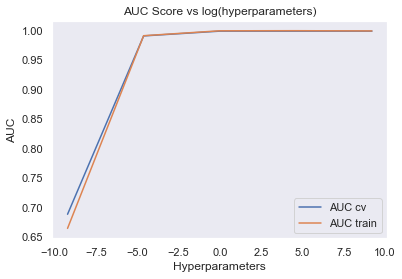

(10000, 0.9989181391994231)


In [84]:
print (find_bestC(X_tr, y_tr, y_cv, 'l1'))

In [58]:
lr=LogisticRegression(C=100, penalty='l1')
lr.fit(X_tr, y_tr)
#predicting probability on Test data
pred_test = lr.predict_proba(X_test)
pred_test=(pred_test)[:,1]
#predicting probablity of Training data
pred_tr = lr.predict_proba(X_tr)
pred_tr=(pred_tr)[:,1]

/Users/714061/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
